In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Method of moments estimation
Want to find a statistic $T(X_1,...,X_n)$ s.t. $E_\theta[T(X_1,...,X_n)] = h(\theta)$ where $h$ has a well-defined inverse. Then, we can set $T(X_1,...,X_n) = h(\hat\theta)$ s.t. $\hat\theta = h^{-1}(T)$

If $X_1,..., X_n$ indep. and $E_\theta(X_i) = h(\theta)$, then by substitution principle, we can estimate $E_\theta(X_i)$ by $\bar X$ and then $\bar X = h(\hat\theta)$ and so $\hat\theta = h^{-1}(\bar X)$

## Example: Exponential Distribution
$X_1,...,X_n$ indep, $f(x;\lambda) = \lambda \exp(-\lambda x), x\geq 0$, $\lambda > 0$ is unknown.

Note that for $r > 0, E_\lambda (X_i^r) = \lambda ^{-r}\Gamma(r+1)$ so that we have MoM estimator 
$$n^{-1}\sum^n X_i^r = \frac{\Gamma(r+1)}{\hat\lambda^r}$$ 
$$\Rightarrow \hat\lambda(r) = \bigg((n\Gamma(r+1)^{-1}\sum^nX_i^r)\bigg)^{-1/r}$$
Using $r = 1$ gives the best estimation (minimized s.d.)

## Example: Gamma Distribution
$X_1,...,X_n$ indep. $f(x;\lambda, \alpha) = \lambda^a x^{a-1}exp(-\lambda x) \Gamma(a)^{-1}, x\geq 0$. $\lambda, a > 0$ are unknown. 
Note that $E(X_i) = a/\lambda, var(X_i) = a/\lambda^2$, so that MoM gives 
$$\bar X = \hat a / \hat \lambda , S^2 = \hat a / \hat \lambda^2$$
$$\Rightarrow \hat a = \bar X^2 / S^2 , \hat \lambda = \bar X / S^2$$

# Confidence Interval
An interval $\mathcal I = [l(X_1,...,X_n), u(X_1,...,X_n)]$ is a CI with coverage $100p\%$ if 
$$P[l(X_1,...,X_n)\leq \theta \leq u(X_1,...,X_n)] = p, \forall \theta\in\Theta$$

## The pivotal method
Is not that often that we can measure such probability directly. One way to work around is to find a r.v. $g(X_1,...,X_n,\theta)$ whose distribution is independent of $\theta$ and any other unknown params. 

## The pivotal method
Is not that often that we can measure such probability directly. One way to work around is to find a r.v. $g(X_1,...,X_n,\theta)$ whose distribution is independent of $\theta$ and any other unknown params. 

# Confidence Interval
An interval $\mathcal I = [l(X_1,...,X_n), u(X_1,...,X_n)]$ is a CI with coverage $100p\%$ if 
$$P[l(X_1,...,X_n)\leq \theta \leq u(X_1,...,X_n)] = p, \forall \theta\in\Theta$$

### Example
For $X_1,...,X_{20}$ indep. $\sim N(\mu, \sigma^2)$, the $95\%$ CI is $[\bar X\pm -2.093\frac{S}{\sqrt{20}}]$. 

The following example is 100 samples of size 20 from $N(0, 1)$ and we note that $95\%$ of the samples falls into the confidence interval. 

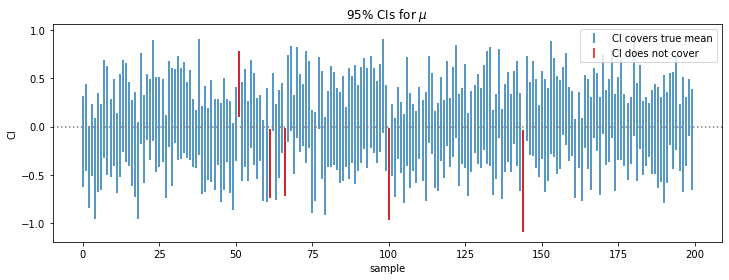

In [62]:
samples = np.random.randn(200, 20)
mean = samples.mean(axis=1)
sd = samples.std(axis=1)
not_in_CI = np.concatenate((np.where(mean + 2.093 * sd / samples.shape[1]**0.5 < 0)[0], 
                            np.where(mean - 2.093 * sd / samples.shape[1]**0.5 > 0)[0]))
plt.figure(figsize=(12, 4))
plt.errorbar(x=np.arange(samples.shape[0]), y=mean, 
             yerr = 2.093 * sd / 20**0.5 , 
             fmt=" ", label="CI covers true mean")
plt.errorbar(x=not_in_CI, y=mean[not_in_CI], 
             yerr = 2.093 * sd[not_in_CI] / 20**0.5 , 
             fmt=" ", color="red", label="CI does not cover")
plt.axhline(0, linestyle=":", color="grey")
plt.xlabel("sample"); plt.ylabel("CI")
plt.title(r"95% CIs for $\mu$"); plt.legend();

## The pivotal method
Is not that often that we can measure such probability directly. One way to work around is to find a r.v. $g(X_1,...,X_n,\theta)$ whose distribution is independent of $\theta$ and any other unknown params. 

# Maximum Likelihood Estimation
Given $(X_1,...,X_n)$ r.v. with joint pdf 
$$f(x_1,...,x_n; \theta_1,...,\theta_k)$$
where $\theta$'s are unknown parameters.  
The likelihood is defined as 
$$\mathcal L(\theta_1, ...,\theta_k) = f(x_1,...,x_n; \theta_1,...,\theta_k)$$
note that $x_1,...,x_n$ are fixed observations

Suppose that for each $\vec x$, $(T_1(\vec x), ..., T_k(\vec x))$ maximize $\mathcal L (\Theta)$ . Then maximum likelihood estimators (MLEs) of $\Theta$ are 
$$\hat \theta_j = T_j(X_1,..., X_n), j = 1,..., k$$

## Existence and uniqueness
- MLE is essentially an ad hoc procedure albeit one that works very well in many problems. 
- MLEs need not be unique, although in most cases, it is unique. 
- MLEs may not exist, typically when the sample size is too small.

## Sufficient Statistic
A statistic $T = (T_1(\vec X), ..., T_m(\vec X))$ is sufficient for $\theta$ if the conditional distribution of $\vec X$ given $T = t$ depends only on $t$. 

### Neyman Factorization Theorem
$T$ is sufficient for $\theta$ IFF 
$$f(\vec x;\theta) = g(T(\vec x); \theta) h(\vec x)$$

## Observed Fisher Information
Given the MLE $\hat \theta$, the observed Fisher information is 
$$\mathcal I(\hat\theta) = -\frac{d^2}{d\theta^2}\ln \mathcal L(\hat\theta)$$
Fisher information is an estimator for standard error, i.e. 
$$\hat se(\hat \theta) = \{\mathcal I(\hat\theta)\}^{-1/2}$$
Mathematically, this is the absolute curvature of the log-likelihood function at its maximum. If this is small, then the estimator is more well-defined (hence with smaller estimated s.e.)

## Approximate normality of MLEs

__Theorem__ For $X_1,...,X_n$ indep. with pdf $f$ for some real-valued $\theta\in \Theta$, if
 - $\Theta$ is an open set
 - $A = \{x: f(x;\theta)> 0\}$ does not depend on $\theta$ (true for the exponential families) 
 - $l(x;\theta)$ is 3-time differentiable w.r.t. $\theta$ for each $x\in A$. 
 
Then, with $\theta_0$ being the true parameter, we have 

\begin{align*}
\sqrt n(\hat\theta_n - \theta_0) &\approx \bigg\{-n^{-1}\sum^n l''(X_i; \theta_0)\bigg\}^{-1}\frac{1}{\sqrt n} \sum^n l'(X_i;\theta_0)\\
&\approx \frac{1}{\sqrt n} \sum^n \frac{l'(X_i; \theta_0)}{\mathcal I(\theta_0)}\\
&\rightarrow^d N(0, \mathcal I(\theta_0)^{-1})
\end{align*}

_proof_. This conclusion follows Taylor expansion 
$$0 = \frac{1}{\sqrt n} \sum^n l'(X_i;\theta_0) + \{\sqrt n (\hat \theta_n - \theta_0)\} \frac{\sum^n l''(X_i; \theta_0)}{n} + \sqrt n(\hat\theta_n - \theta_0) \times R_n$$
where $R_n = \frac{1}{2}(\hat\theta_n - \theta_0) \frac{\sum^nl''(X_i; \theta_n^*)}{n}$ is the Taylor's remainder with $\theta_n^*$ in between $\hat\theta_n, \theta_0$
so that 
$$\sqrt n (\hat\theta_n - \theta_0) =\bigg\{-n^{-1}\sum^n l''(X_i; \theta_0) - R_n\bigg\}^{-1}\frac{1}{\sqrt n} \sum^n l'(X_i;\theta_0)$$
Then, note that $\hat\theta_n - \theta_0 \rightarrow ^p 0$ (i.e. $\hat\theta$) is a "good" estimator from the assumption, and $\frac{1}{n}\sum l''(X_i; \theta_n^*)$ is bounded. so that their product, 
$$ R_n = \frac{1}{2}(\hat\theta_n - \theta_0) \frac{\sum^nl''(X_i; \theta_n^*)}{n}\rightarrow^p 0$$
Therefore, $\sqrt{\hat\theta_n - \theta_0}\rightarrow^d (0, \mathcal I(\theta_0)^{-1})$